# Exercise 6

In [12]:
import numpy as np
from numpy.random import *
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import factorial

1. The number of busy lines in a trunk group (Erlang system) is given by a truncated Poisson distribution. Generate values from this distribution by applying the Metropolis-Hastings algorithm, verify with a $χ^2$
-test.

Chi-square statistic: 0.0005831586144788525
p-value: 1.0


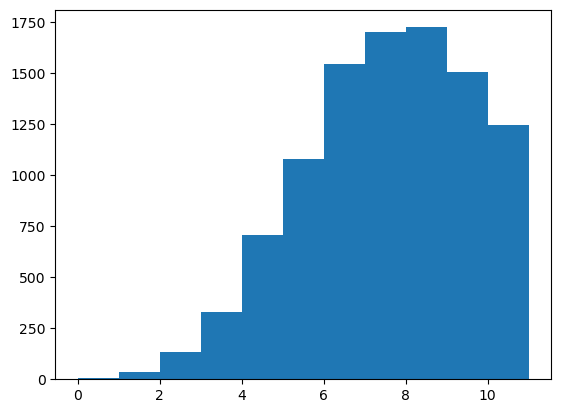

In [13]:
def tp(i, A):
    return (A**i) / np.math.factorial(i)

def mh(n,m,A):
	res = [0]
	for i in range(n-1):
		x = res[i]
		y = np.random.randint(0,m+1)
		gx = tp(x, A)
		gy = tp(y, A)
		ap = min(1,gy/gx)
		if np.random.uniform() <= ap:
			res.append(y)
		else:
			res.append(x)
	return res

n = 10000
m = 10
A = 8
res = mh(n,m,A)

obs, _, _ = plt.hist(res, bins=range(m+2), density=False)
obs = obs/np.sum(obs)
exp = np.array([tp(i, A)*n for i in range(m+1)])
exp = exp/np.sum(exp)
chi2, p_value = stats.chisquare(obs, exp)

print("Chi-square statistic:", chi2)
print("p-value:", p_value)

2. For two different call types the joint number of occupied lines

(a) use Metropolis-Hastings, directly to generate variates from this distribution.

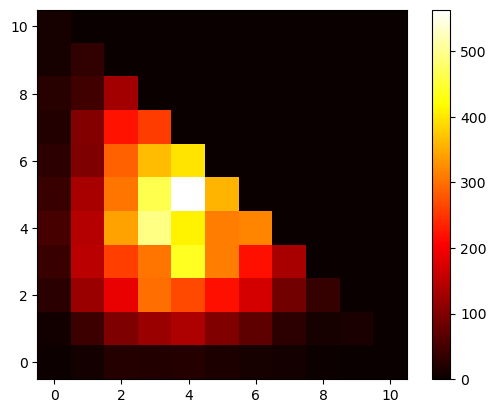

In [14]:
def tp2(i,j, A1, A2):
    return (A1**i)*(A2**j) / (np.math.factorial(i)*np.math.factorial(j))

def mmhd(n,m,A1,A2):
    res1 = [randint(0,m+1)]
    res2 = [randint(0,m+1-res1[0])]
    for i in range(n-1):
        x1 = res1[i]
        y1 = np.random.randint(0,m+1)
        x2 = res2[i]
        y2 = np.random.randint(0,m+1-y1)

        gx = tp2(x1,x2,A1,A2)
        gy = tp2(y1,y2,A1,A2)
        ap = min(1,gy/gx)
        if np.random.uniform() <= ap:
            res1.append(y1)
            res2.append(y2)
        else:
            res1.append(x1)
            res2.append(x2)
    return res1, res2

n = 10000
m = 10
A1 = 4
A2 = 4
res1, res2 = mmhd(n,m,A1,A2)

#obs1, _, _ = plt.hist(res1, bins=10, density=True, alpha=0.6)
#obs2, _, _ = plt.hist(res2, bins=10, density=True, alpha=0.6)
#obs,_,_ = plt.hist([res1,res2], bins=10, alpha=0.7, density=True)
#plt.show()
#exp = np.array([tp(i, A) for i in range(m)])
#exp = np.array([tp2(i,j,A1,A2) for i in range(m) for j in range(m)])
#exp = exp/np.sum(exp)
#_, p1 = stats.chisquare(obs1, exp)
#_, p2 = stats.chisquare(obs2, exp)
#_, p = stats.chisquare(obs,exp)
#print(p1,p2)
#print(p)

grid = np.zeros((m+1, m+1))

for i in range(n):
    x = res1[i]
    y = res2[i]
    grid[x][y] += 1

plt.imshow(grid, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

(b) Use Metropolis-Hastings, coordinate wise to generate variates from this distribution.

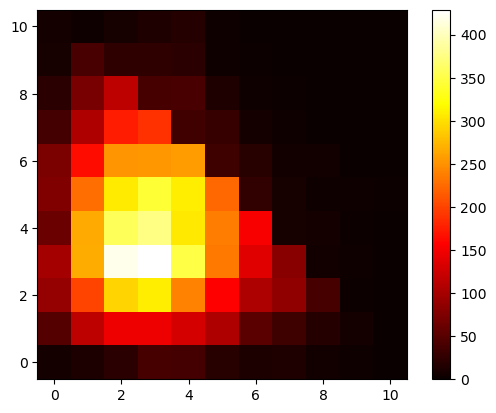

In [15]:
def mmhcw(n,m,A1,A2):
    res1 = [randint(0,m+1)]
    res2 = [randint(0,m+1-res1[0])]
    for i in range(n-1):
        x1 = res1[i]
        y1 = np.random.randint(0,m+1)
        x2 = res2[i]
        y2 = np.random.randint(0,m+1-y1)

        gx1 = tp(x1,A1)
        gx2 = tp(x2,A1)
        gy1 = tp(y1,A2)
        gy2 = tp(y2,A2)

        ap1 = min(1,gy1/gx1)
        ap2 = min(1,gy2/gx2)
        if np.random.uniform() <= ap1:
            res1.append(y1)
        else:
            res1.append(x1)
        if np.random.uniform() <= ap2:
            res2.append(y2)
        else:
            res2.append(x2)
    return res1, res2

n = 10000
m = 10
A1 = 4
A2 = 4
res1, res2 = mmhcw(n,m,A1,A2)

#obs1, _, _ = plt.hist(res1, bins=10, density=True, alpha=0.6)
#obs2, _, _ = plt.hist(res2, bins=10, density=True, alpha=0.6)
#obs,_,_ = plt.hist([res1,res2], bins=10, alpha=0.7, density=True)
#plt.show()
#exp = np.array([tp(i, A) for i in range(m)])
#exp = np.array([tp2(i,j,A1,A2) for i in range(m) for j in range(m)])
#exp = exp/np.sum(exp)
#_, p1 = stats.chisquare(obs1, exp)
#_, p2 = stats.chisquare(obs2, exp)
#_, p = stats.chisquare(obs,exp)
#print(p1,p2)
#print(p)

grid = np.zeros((m+1, m+1))

for i in range(n):
    x = res1[i]
    y = res2[i]
    grid[x][y] += 1

plt.imshow(grid, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

(c) Use Gibbs sampling to sample from the distribution.

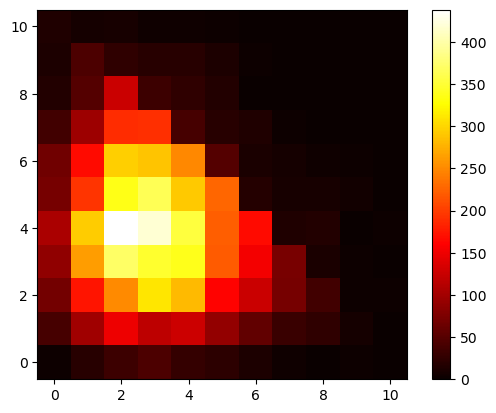

In [16]:
def gibbs(n, m, A1, A2):
    res1 = [np.random.randint(0, m+1)]
    res2 = [np.random.randint(0, m+1-res1[0])]
    for _ in range(n):
        
        pi = [tp2(k, j, A1, A2) for k in range(m+1)]
        pi /= np.sum(pi)
        i = np.random.choice(range(m+1), p=pi)
        res1.append(i)
        
        pj = [tp2(i, k, A1, A2) for k in range(m+1-i)]
        pj /= np.sum(pj)
        j = np.random.choice(range(m+1-i), p=pj)
        res2.append(j)
    
    return res1, res2

n = 10000
m = 10
A1 = 4
A2 = 4
res1, res2 = mmhcw(n,m,A1,A2)

#obs1, _, _ = plt.hist(res1, bins=10, density=True, alpha=0.6)
#obs2, _, _ = plt.hist(res2, bins=10, density=True, alpha=0.6)
#obs,_,_ = plt.hist([res1,res2], bins=10, alpha=0.7, density=True)
#plt.show()
#exp = np.array([tp(i, A) for i in range(m)])
#exp = np.array([tp2(i,j,A1,A2) for i in range(m) for j in range(m)])
#exp = exp/np.sum(exp)
#_, p1 = stats.chisquare(obs1, exp)
#_, p2 = stats.chisquare(obs2, exp)
#_, p = stats.chisquare(obs,exp)
#print(p1,p2)
#print(p)

grid = np.zeros((m+1, m+1))

for i in range(n):
    x = res1[i]
    y = res2[i]
    grid[x][y] += 1

plt.imshow(grid, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

3. We consider a Bayesian statistical problem. The observations are $X_i ∼ N(Θ, Ψ)$, where the prior distribution of the pair $(Ξ, Γ) = (log (Θ), log (Ψ))$ is standard normal with correlation $ρ = 1/2$.

(a) Generate a pair $(θ, ψ)$ from the prior distribution, i.e. the distribution for the pair $(Θ, Ψ)$, by first generating a sample $(ξ, γ)$ of $(Ξ, Γ)$.

In [17]:
[ksi, gamma] = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=None, check_valid='warn', tol=1e-8)

[theta, psi] = np.exp([ksi, gamma])

(b) Generate $X_i = 1, . . . , n$ with the values of $(θ, ψ)$ you obtained in item 3a. Use n = 10.


In [18]:
n = 10
X = np.random.normal(theta, psi, size=n)

(c) Derive the posterior distribution of (Θ, Ψ) given the sample.

In [19]:
def pd(x,theta,psi):
    return np.exp(-len(x)*(np.mean(x)-theta)**2/2*psi)*np.exp(-(np.sum(x - np.mean(x)))**2/2*psi)

(d) Generate MCMC samples from the posterior distribution of $(Θ, Ψ)$ using the Metropolis Hastings method.

In [20]:
def mh2(X, n):
    res1, res2 = [], []
    
    ksi_x, gamma_x = np.random.normal(0, 0.01, size=2)
    theta_x, psi_x = np.exp([ksi_x, gamma_x])
    gx = pd(X, theta_x, psi_x)
    
    for i in range(n):

        ksi_y, gamma_y = np.random.normal(0, 0.0001, size=2)
        theta_y, psi_y = np.exp([ksi_y, gamma_y])
        gy = pd(X, theta_y, psi_y)

        ap = min(1, gy / gx)
        if np.random.uniform() <= ap:
            theta_x, psi_x = theta_y, psi_y
            gx = gy
        res1.append(theta_x)
        res2.append(psi_x)
    return res1, res2

(e) Repeat item 3d with n = 100 and n = 1000, still using the values of $(θ, ψ)$ from item 3a. Discuss the results.

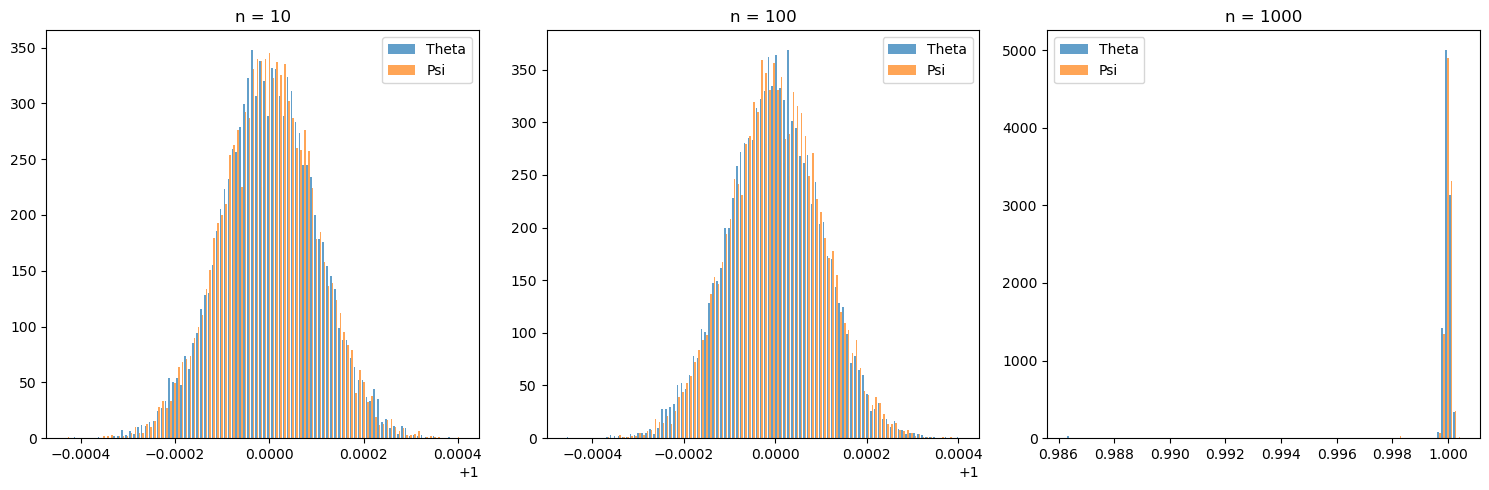

In [21]:
nl = np.array([10,100,1000])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, n in enumerate(nl):
    X = np.random.normal(theta, psi, size=n)
    theta_samples2, psi_samples2 = mh2(X, 10000)
    axes[i].hist([theta_samples2, psi_samples2], bins=100, alpha=0.7, label=["Theta", "Psi"], density=False)
    axes[i].set_title(f'n = {n}')
    axes[i].legend()

plt.tight_layout()
plt.show()